<a href="https://colab.research.google.com/github/BileOara/REGRESSION/blob/master/Jedi_Regression_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset:


The files for download according to the hackathon:

* `Train.csv` - is the dataset that you will use to train your model
* `Test.csv` - is the dataset on which you will apply your model to.
* `Riders.csv` - contains unique rider Ids, number of orders, age, rating and number of ratings
* `VariableDefinitions.csv` - Definitions of variables in the Train, Test and Riders files

The above files are accounted for.

An additional file, `SampleSubmission.csv` was available for download as well

## Variable identification:

The very first step in exploratory data analysis is to identify the type of variables in the dataset.
Variables are of two types — **Numerical**  and  **Categorical**.

  ####   Numerical Variables:             

* Placement - Day of Month  
* Placement - Weekday (Mo = 1)
* Placement - Time       
* Confirmation - Day of Month            
* Confirmation - Weekday (Mo = 1)                                 
* Confirmation - Time                                             
* Arrival at Pickup - Day of Month                                
* Arrival at Pickup - Weekday (Mo = 1)
* Arrival at Pickup - Time
* Pickup - Day of Month
* Pickup - Weekday (Mo = 1)
* Pickup - Time
* Arrival at Destination - Day of Month
* Arrival at Destination - Weekday (Mo = 1)
* Arrival at Destination - Time  
* Distance (KM)
* Temperature
* Precipitation in millimeters
* Pickup Lat
* Pickup Long
* Destination Lat
* Destination Long
* Time from Pickup to Arrival 
* No_Of_Orders
* Age
* Average_Rating
* No_of_Ratings


#### Categorical Variable:

* Order No
* User Id
* Vehicle Type
* Platform Type
* Personal or Business
* Rider Id

The target value is ***Time from Pickup to Arrival*** and the rest 33 features can be assumed as the predictor variables.

## Importing Libraries:

In [0]:
# Import modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Figures inline and set visualization style
%matplotlib inline
sns.set()


## Importing Dataset:

In [0]:
# Import data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')

# Merge both train and test data according to the VariableDefinitions.csv file:

train_df = pd.merge(train, riders, how='left', on='Rider Id')
test_df = pd.merge(test, riders, how='left', on='Rider Id')

In [0]:
train_df.columns = ['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 
       'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time from Pickup to Arrival']

In [0]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [0]:
#Copy the train_df for use:
train_df1 = train_df.copy()

## Identification of data types:

In [0]:
train_df1.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

* `Platform Type ` - is a categorical variable ('object'). After importing the dataset it appears as integers.
* `Placement - Time` , `Confirmation - Time` , `Arrival at Pickup - Time`, `Pickup - Time`, `Arrival at Destination - Time`    are all date-time type, but appear as category type.

***We have to convert the them during data cleaning.***

## Size of the dataset:

In [0]:
print('\n')
print('- Train dataset has {} observations and {} columns.'.format(list(train_df.shape)[0], list(train_df.shape)[1]))
print('\n')
print('- Test dataset has {} observations and {} columns.'.format(list(test_df.shape)[0], list(test_df.shape)[1]))



- Train dataset has 21201 observations and 33 columns.


- Test dataset has 7068 observations and 29 columns.


## Statistical Summary of Numeric Variables:

In [0]:
train_df1.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


## EDA: General:


In the following of categorical variable, we are going to look at `Vehicle Type` and `Personal or Business`. We can the study the other categorical variable of the dataset in the same way as shown in the following code.

### To get the most frequently occurring elements:

In [0]:
# Check the most frequently occurring elements:

frequency_Vehicle_Type = train_df1['Vehicle Type'].value_counts(normalize=True)
frequency_Personal_or_Business = train_df1['Personal or Business'].value_counts(normalize=True)

print(frequency_Vehicle_Type)
print('\n') # To keep the blank line for display
print(frequency_Personal_or_Business)

Bike    1.0
Name: Vehicle Type, dtype: float64


Business    0.819961
Personal    0.180039
Name: Personal or Business, dtype: float64


* We have noticed that `Vehicle Type` is only a Bike, we will it, as this will not be necessary for our analysis.

In [0]:
# Drop Vehicle Type column

train_df1 = train_df1.drop(['Vehicle Type'], axis=1)

### To perform Conversion between Data Types:

* Remember that we mentioned above about `Platform Type` as categorical variable, but appear as integer. We will convert our data to categorical variable and check the level of distribution( most frequently occurring elements ).

* We will convert the set of object: `Placement - Time`, `Confirmation - Time`, `Arrival at Pickup - Time`, `Pickup - Time`, `Arrival at Destination - Time` to DataTime Type.

In [0]:
#Convert the variable to categorical datatype
train_df1['Platform Type'] = train_df1['Platform Type'].astype('object')

#Check the datatype of Platform Type after type conversion
print('- The datatype of Platform Type is '+ str(train_df1['Platform Type'].dtype)+ '.')
print('\n')

#Check the most frequently occurring elements after conversion
frequency_Platform_Type = train_df1['Platform Type'].value_counts(normalize=True)
print('- Most frequently occurring element: Platform Type')
print(frequency_Platform_Type)

- The datatype of Platform Type is object.


- Most frequently occurring element: Platform Type
3    0.851564
1    0.101269
2    0.046224
4    0.000943
Name: Platform Type, dtype: float64


In [0]:
# Convert the variable to DateTime datatype in seconds

# Function to convert the date format 
def convert12_to_24(time): 
      
    # Checking if last two elements of time 
    # is AM and first two elements are 12 
    if time[-2:] == "AM" and time[:2] == "12": 
        return "00" + time[2:-2] 
          
    # remove the AM     
    elif time[-2:] == "AM": 
        return time[:-2] 
      
    # Checking if last two elements of time 
    # is PM and first two elements are 12    
    elif time[-2:] == "PM" and time[:2] == "12": 
        return time[:-2] 
    
    # add 12 to hours and remove PM     
    elif time[:2] == time[:1] + ':':
        return str(int(time[:1]) + 12) + time[1:8] 
    else:      
         return str(int(time[:2]) + 12) + time[2:8] 

In [0]:
#Modifying and converting to 24hours as string:
train_df1['Placement - Time'] = train_df1['Placement - Time'].apply(convert12_to_24)
train_df1['Confirmation - Time'] = train_df1['Confirmation - Time'].apply(convert12_to_24)
train_df1['Arrival at Pickup - Time'] = train_df1['Arrival at Pickup - Time'].apply(convert12_to_24)
train_df1['Pickup - Time'] = train_df1['Pickup - Time'].apply(convert12_to_24)
train_df1['Arrival at Destination - Time'] = train_df1['Arrival at Destination - Time'].apply(convert12_to_24)


#Convert our time to seconds and it's datatype to integer:
train_df1['Placement - Time'] = pd.to_timedelta(train_df1['Placement - Time']).dt.total_seconds()
train_df1['Confirmation - Time'] = pd.to_timedelta(train_df1['Confirmation - Time']).dt.total_seconds()
train_df1['Arrival at Pickup - Time'] = pd.to_timedelta(train_df1['Arrival at Pickup - Time']).dt.total_seconds()
train_df1['Pickup - Time'] = pd.to_timedelta(train_df1['Pickup - Time']).dt.total_seconds()
train_df1['Arrival at Destination - Time'] = pd.to_timedelta(train_df1['Arrival at Destination - Time']).dt.total_seconds()

#Change float64 to int64:
train_df1['Placement - Time'] = train_df1['Placement - Time'].astype('int64')
train_df1['Confirmation - Time'] = train_df1['Confirmation - Time'].astype('int64')
train_df1['Arrival at Pickup - Time'] = train_df1['Arrival at Pickup - Time'].astype('int64')
train_df1['Pickup - Time'] = train_df1['Pickup - Time'].astype('int64')
train_df1['Arrival at Destination - Time'] = train_df1['Arrival at Destination - Time'].astype('int64')

In [0]:
train_df1.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,34546,9,5,34810,9,5,36287,9,5,37650,9,5,38395,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,3,Personal,12,5,40576,12,5,41001,12,5,42022,12,5,42249,12,5,44242,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,3,Business,30,2,45565,30,2,45764,30,2,46174,30,2,46383,30,2,46838,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,3,Business,15,5,33934,15,5,33965,15,5,34676,15,5,34986,15,5,36327,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,1,Personal,13,1,35718,13,1,35778,13,1,36233,13,1,36323,13,1,37537,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
# Final check: If Variable Types that are mentioned above are similar or match with the imported dataset:

train_df1.dtypes

Order No                                      object
User Id                                       object
Platform Type                                 object
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                               int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                            int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                       int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                  int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 

* All variables are in right position of their variable types: Numerical and Categorical, as the `VariableDefinitions.csv` explained.

### The target variable : Time from Pickup to Arrival

count    21201.000000
mean       341.067119
std        402.867746
min          0.000000
25%         61.000000
50%        161.000000
75%        495.000000
max       2298.000000
Name: Time from Pickup to Arrival, dtype: float64
Skewness: 1.951117
Kurtosis: 4.257682


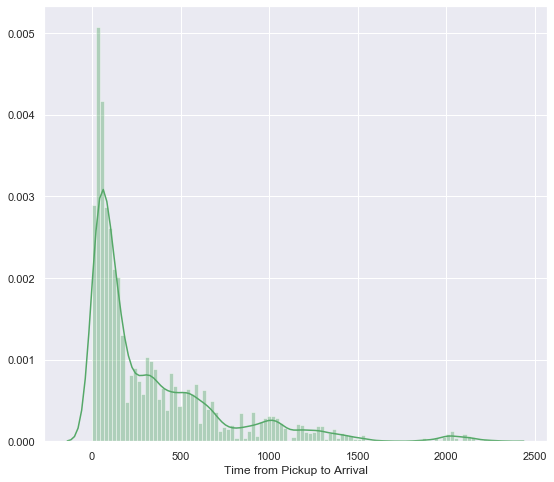

In [0]:
print(train_df1['Time from Pickup to Arrival'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df1['Time from Pickup to Arrival'], color='g', bins=100, hist_kws={'alpha': 0.4});
#skewness and kurtosis
print("Skewness: %f" % train_df1['Time from Pickup to Arrival'].skew())
print("Kurtosis: %f" % train_df1['Time from Pickup to Arrival'].kurt())

As we see, the target variable Time from Pickup to Arrival is not normally distributed.
This can reduce the performance of the ML regression models because some assume normal distribution.
Therefore we make a log transformation, the resulting distribution looks much better.

### List of features with missing values

In [0]:
numerical_features = train_df1.dtypes[train_df1.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train_df1.dtypes[train_df1.dtypes == "object"].index
print("Number of Numerical features: ", len(categorical_features))

Number of Numerical features:  27
Number of Numerical features:  5


In [0]:
total = train_df1.isnull().sum().sort_values(ascending=False)
percent = (train_df1.isnull().sum()/train_df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Precipitation in millimeters,20649,0.973963
Temperature,4366,0.205934
Time from Pickup to Arrival,0,0.000000
Confirmation - Weekday (Mo = 1),0,0.000000
Arrival at Pickup - Time,0,0.000000


In [0]:
#Filling the missing value with median of Temperature
train_df1['Temperature'] = train_df1['Temperature'].fillna(train_df1['Temperature'].median())

#Drop the column
train_df1 = train_df1.drop(['Precipitation in millimeters'], axis=1)

In [0]:
train_df1.isna().sum()

Order No                                     0
User Id                                      0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat   

We checked the percentage of missing values in a data:
 * `Precipitation in millimeters` is 97.4% and we find out that is not useful for analysis. We have removed it.
 * `Temperature` is 20.6% and it can be useful in our data. We filled the missing value with a median of the variable. Median is also perfect in terms of avoiding the outliers.
 

#### Now lets plot them all:

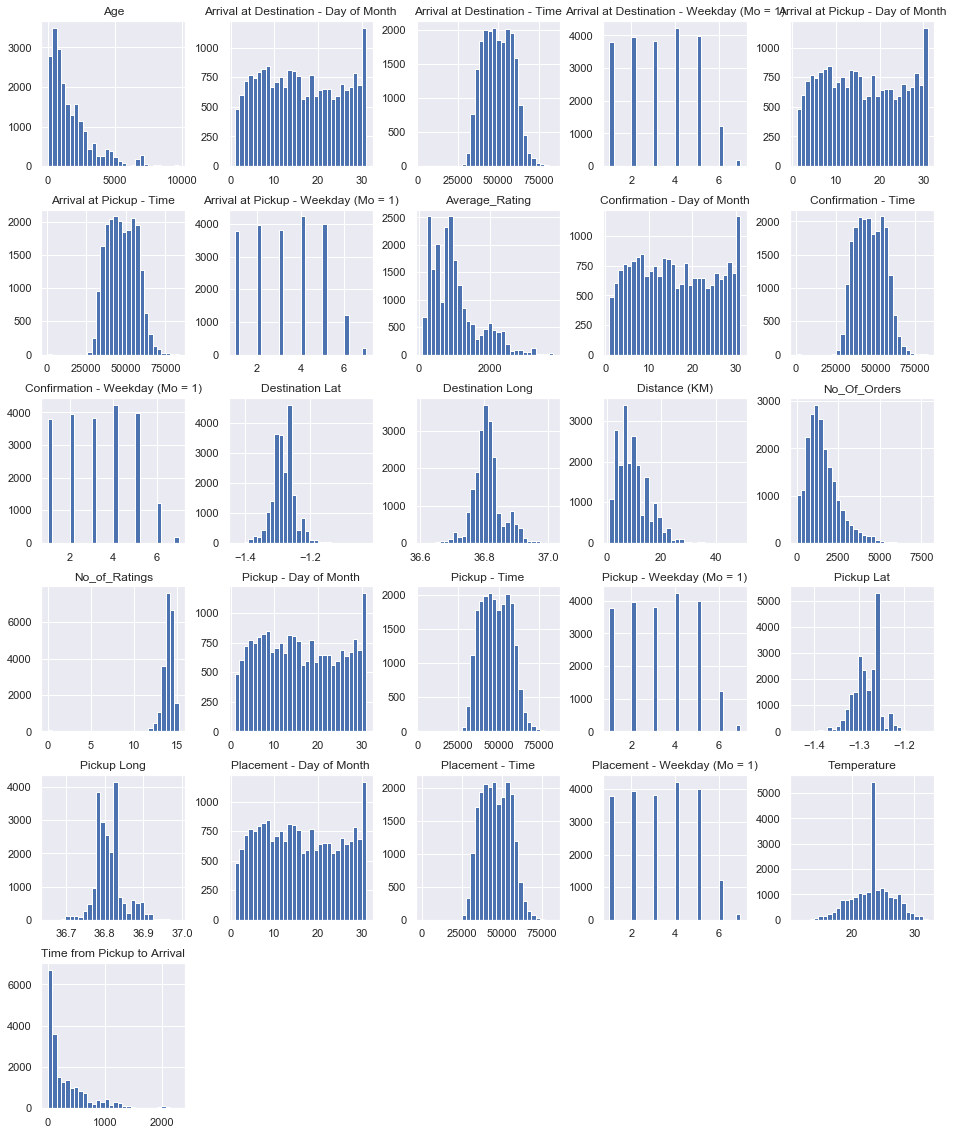

In [0]:
train_df1.hist(figsize=(16, 20), bins=30);

In [0]:
numerical_features = train_df1.dtypes[train_df1.dtypes != "object"].index
categorical_features = train_df1.dtypes[train_df1.dtypes == "object"].index
for col in numerical_features:
    print('{:50}'.format(col), 
          'Skewness: {:05.2f}'.format(train_df1[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_df1[col].kurt())  
         )

Placement - Day of Month                           Skewness: 00.09     Kurtosis: -01.21
Placement - Weekday (Mo = 1)                       Skewness: 00.11     Kurtosis: -01.02
Placement - Time                                   Skewness: 00.15     Kurtosis: -00.66
Confirmation - Day of Month                        Skewness: 00.09     Kurtosis: -01.21
Confirmation - Weekday (Mo = 1)                    Skewness: 00.11     Kurtosis: -01.02
Confirmation - Time                                Skewness: 00.15     Kurtosis: -00.68
Arrival at Pickup - Day of Month                   Skewness: 00.09     Kurtosis: -01.21
Arrival at Pickup - Weekday (Mo = 1)               Skewness: 00.11     Kurtosis: -01.02
Arrival at Pickup - Time                           Skewness: 00.15     Kurtosis: -00.68
Pickup - Day of Month                              Skewness: 00.09     Kurtosis: -01.21
Pickup - Weekday (Mo = 1)                          Skewness: 00.11     Kurtosis: -01.02
Pickup - Time                   

Features such as `Age `, `Destination Long`, `Pickup - Weekday (Mo = 1)`, `Pickup Lat`. Seems to share a similar distribution to the one we have with `Time from Pickup to Arrival`. Lets see if we can find new clues later.

### Correlation:

Now we'll try to find which features are strongly correlated with Time from Pickup to Arrival. We will store them in a new variable called *features_list*.

In [0]:
train_df_corr = train_df1.corr()['Time from Pickup to Arrival'][:-1] # -1 because the latest row is Time from Pickup to Arrival
features_list = train_df_corr[abs(train_df_corr) > 0.5].sort_values(ascending=False)
print("There is/are {} strongly correlated value(s) with Time from Pickup to Arrival:\n{}".format(len(features_list), features_list))

There is/are 2 strongly correlated value(s) with Time from Pickup to Arrival:
Age               0.857918
Average_Rating    0.651090
Name: Time from Pickup to Arrival, dtype: float64


We now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

   - Plot the numerical features and see which ones have very few or explainable outliers.
   - Remove the outliers from these features and see which one can have a good correlation without their outliers.

But, correlation by itself does not always explain the relationship between data so plotting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the `Time from Pickup to Arrival`.

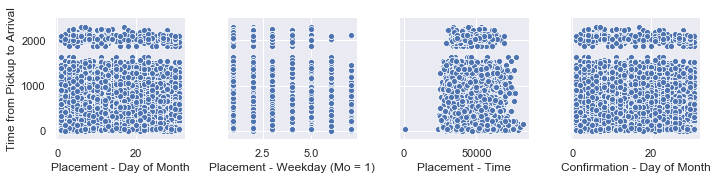

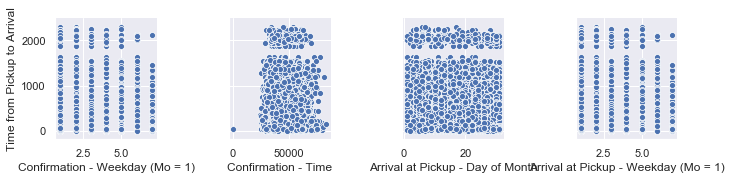

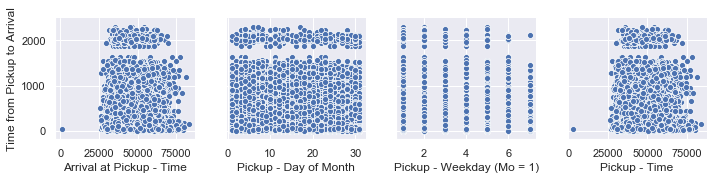

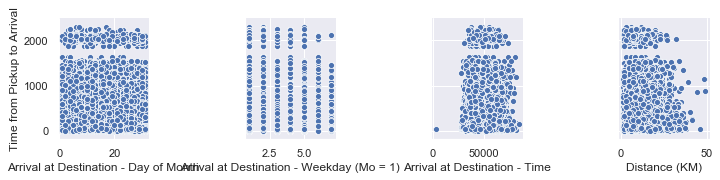

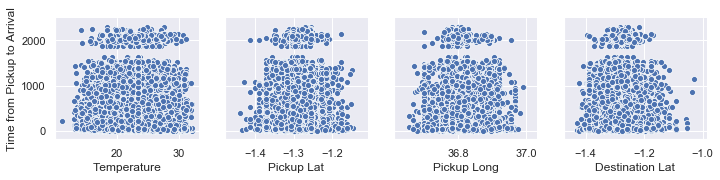

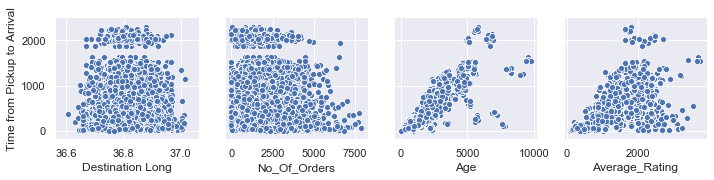

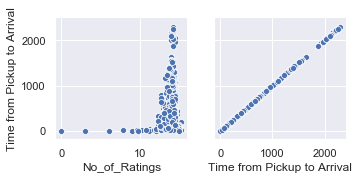

In [0]:
numerical_features = train_df1.dtypes[train_df1.dtypes != "object"].index
for i in range(0, len(train_df1[np.array(numerical_features)].columns), 4):
    sns.pairplot(data=train_df1,
                x_vars=train_df1[np.array(numerical_features)].columns[i:i+4],
                y_vars=['Time from Pickup to Arrival'])

We can clearly identify some relationships. Most of them seems to have no linear relationship with `Time from Pickup to Arrival`, because of overplotting which shows that there are either a large number of data points and/or a small number of unique values in the dataset.

#### Relation to `Time from Pickup to Arrival` for all categorical features:

In [0]:
categorical_features = train_df1.dtypes[train_df1.dtypes == "object"].index
train_df1[np.array(categorical_features)].head()

,Order No,User Id,Platform Type,Personal or Business,Rider Id
0,Order_No_4211,User_Id_633,3,Business,Rider_Id_432
1,Order_No_25375,User_Id_2285,3,Personal,Rider_Id_856
2,Order_No_1899,User_Id_265,3,Business,Rider_Id_155
3,Order_No_9336,User_Id_1402,3,Business,Rider_Id_855
4,Order_No_27883,User_Id_1737,1,Personal,Rider_Id_770


We are plotting `Platform Type` and `Personal or Business` :

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

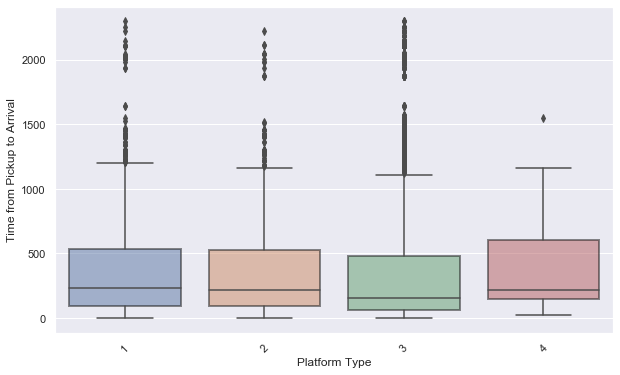

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x=train_df1['Platform Type'], y=train_df1['Time from Pickup to Arrival'], data=train_df1[np.array(categorical_features)])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

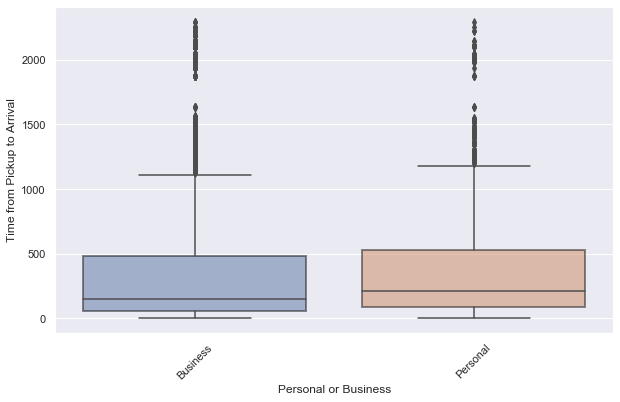

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x=train_df1['Personal or Business'], y=train_df1['Time from Pickup to Arrival'], data=train_df1[np.array(categorical_features)])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

* For many all the categorical variable there is no strong relationship with our target variable.

### Check the distribution of categorical relation to target variable:

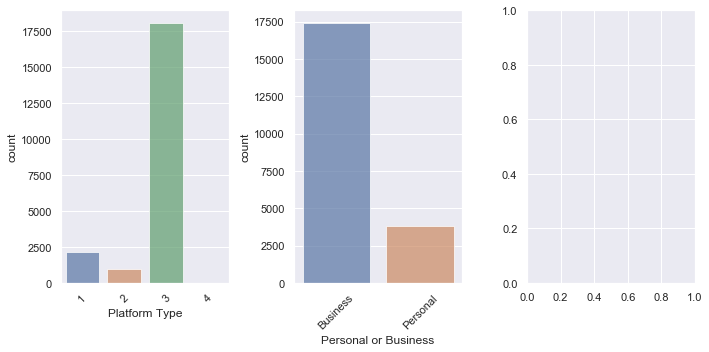

In [0]:
cat_df = train_df1[np.array(categorical_features)[2:4]]
fig, axes = plt.subplots(round(len(cat_df.columns) / 3), 3, figsize=(10, 5))

for i, ax in enumerate(fig.axes):
    if i < len(cat_df.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_df.columns[i], alpha=0.7, data=cat_df, ax=ax)

fig.tight_layout()

* `Platform Type` feature may not be relevant for predictive model. Since x ~ 4 is very low in percentage.

## Preprocessing the Dataset

---------------------------------------------------------------------------------------------------------------------------

* We are going to combine both train_df and test_df. So, we can handle missing values and do Feature Engineering
* Through EDA process, we have discovered that a categorical variable: `Personal or Business`, seems to be more relevant in terms of training the model and predict.

* We are going to rename `Personal or Business` and change it to `Delivery Type`. For better formatting when we are going to do Feature Encoding.

In [0]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [0]:
# Store target variable of training data in a safe place
Time_from_Pickup_to_Arrival = train_df['Time from Pickup to Arrival']

# Concatenate training and test sets
data = pd.concat([train_df.drop(['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time', 'Time from Pickup to Arrival'], axis=1), test_df])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 29 columns):
Order No                                28269 non-null object
User Id                                 28269 non-null object
Vehicle Type                            28269 non-null object
Platform Type                           28269 non-null int64
Personal or Business                    28269 non-null object
Placement - Day of Month                28269 non-null int64
Placement - Weekday (Mo = 1)            28269 non-null int64
Placement - Time                        28269 non-null object
Confirmation - Day of Month             28269 non-null int64
Confirmation - Weekday (Mo = 1)         28269 non-null int64
Confirmation - Time                     28269 non-null object
Arrival at Pickup - Day of Month        28269 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    28269 non-null int64
Arrival at Pickup - Time                28269 non-null object
Pickup - Day of Month          

#### Remove features:

In [0]:
remove_features = ['Order No', 'User Id', 'Vehicle Type', 'Platform Type', 'Precipitation in millimeters', 'Rider Id']
data = data.drop(remove_features, axis=1)

In [0]:
data.head()

,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309.0,13.8
1,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,396,339.0,13.6
2,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,3,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242.0,12.5
3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,886,283.0,14.5
4,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872.0,14.1


#### Handling missing value:

In [0]:
# Impute missing numerical variables
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].median())

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 23 columns):
Personal or Business                    28269 non-null object
Placement - Day of Month                28269 non-null int64
Placement - Weekday (Mo = 1)            28269 non-null int64
Placement - Time                        28269 non-null object
Confirmation - Day of Month             28269 non-null int64
Confirmation - Weekday (Mo = 1)         28269 non-null int64
Confirmation - Time                     28269 non-null object
Arrival at Pickup - Day of Month        28269 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    28269 non-null int64
Arrival at Pickup - Time                28269 non-null object
Pickup - Day of Month                   28269 non-null int64
Pickup - Weekday (Mo = 1)               28269 non-null int64
Pickup - Time                           28269 non-null object
Distance (KM)                           28269 non-null int64
Temperature                      

#### Formatting a feature and Datatype conversion:

In [0]:
#Modifying and converting to 24hours as string:
data['Placement - Time'] = data['Placement - Time'].apply(convert12_to_24)
data['Confirmation - Time'] = data['Confirmation - Time'].apply(convert12_to_24)
data['Arrival at Pickup - Time'] = data['Arrival at Pickup - Time'].apply(convert12_to_24)
data['Pickup - Time'] = data['Pickup - Time'].apply(convert12_to_24)


#Convert our time to seconds and it's datatype to integer:
data['Placement - Time'] = pd.to_timedelta(data['Placement - Time']).dt.total_seconds()
data['Confirmation - Time'] = pd.to_timedelta(data['Confirmation - Time']).dt.total_seconds()
data['Arrival at Pickup - Time'] = pd.to_timedelta(data['Arrival at Pickup - Time']).dt.total_seconds()
data['Pickup - Time'] = pd.to_timedelta(data['Pickup - Time']).dt.total_seconds()

#Change float64 to int64:
data['Placement - Time'] = data['Placement - Time'].astype('int64')
data['Confirmation - Time'] = data['Confirmation - Time'].astype('int64')
data['Arrival at Pickup - Time'] = data['Arrival at Pickup - Time'].astype('int64')
data['Pickup - Time'] = data['Pickup - Time'].astype('int64')


In [0]:
# Renaming a feature
data.columns = ['Delivery Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings']

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 23 columns):
Delivery Type                           28269 non-null object
Placement - Day of Month                28269 non-null int64
Placement - Weekday (Mo = 1)            28269 non-null int64
Placement - Time                        28269 non-null int64
Confirmation - Day of Month             28269 non-null int64
Confirmation - Weekday (Mo = 1)         28269 non-null int64
Confirmation - Time                     28269 non-null int64
Arrival at Pickup - Day of Month        28269 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    28269 non-null int64
Arrival at Pickup - Time                28269 non-null int64
Pickup - Day of Month                   28269 non-null int64
Pickup - Weekday (Mo = 1)               28269 non-null int64
Pickup - Time                           28269 non-null int64
Distance (KM)                           28269 non-null int64
Temperature                          

#### Feature Encoding:

In [0]:
#Create a fubction to encode the feature
def dummy_encode(input_df):
    # your code here
    dummy_df = pd.get_dummies(input_df, columns= ['Delivery Type'], drop_first=True)
    return dummy_df

In [0]:
data = dummy_encode(data)
data.head()

,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Delivery Type_Personal
0,9,5,34546,9,5,34810,9,5,36287,9,5,37650,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309.0,13.8,0
1,12,5,40576,12,5,41001,12,5,42022,12,5,42249,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993,396,339.0,13.6,1
2,30,2,45565,30,2,45764,30,2,46174,30,2,46383,3,23.4,-1.308284,36.843419,-1.300921,36.828195,455,1023,242.0,12.5,0
3,15,5,33934,15,5,33965,15,5,34676,15,5,34986,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341,886,283.0,14.5,0
4,13,1,35718,13,1,35778,13,1,36233,13,1,36323,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872.0,14.1,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 23 columns):
Placement - Day of Month                28269 non-null int64
Placement - Weekday (Mo = 1)            28269 non-null int64
Placement - Time                        28269 non-null int64
Confirmation - Day of Month             28269 non-null int64
Confirmation - Weekday (Mo = 1)         28269 non-null int64
Confirmation - Time                     28269 non-null int64
Arrival at Pickup - Day of Month        28269 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    28269 non-null int64
Arrival at Pickup - Time                28269 non-null int64
Pickup - Day of Month                   28269 non-null int64
Pickup - Weekday (Mo = 1)               28269 non-null int64
Pickup - Time                           28269 non-null int64
Distance (KM)                           28269 non-null int64
Temperature                             28269 non-null float64
Pickup Lat                          

## Scikit-learn Regression models and comparison of results

#### We test the following Regressors from scikit-learn:
----------------------------------------------------
* LinearRegression
* Ridge
* Lasso
* DecisionTreeRegressor
* RandomForestRegressor